<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-3-r0.csv?token=AKVFSODX6I2TT734XLXBWHK6ZLG42')
print(df.shape)
df

(89599, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9,1
1,88,0,1,4,1,1,5,17,23,7,0,0,1,4,4,1.000000,20,6,2,7,12,84,0,4,4,4,20,85,100,1
2,88,1,2,1,1,4,3,9,3,3,24,8,3,5,3,0.600000,16,5,3,7,15,105,2,1,4,12,3,27,9,1
3,89,0,1,4,2,2,5,17,23,7,0,0,1,4,4,1.000000,21,4,4,7,16,112,0,8,16,16,20,85,100,1
4,90,0,1,4,3,2,5,17,23,7,0,0,1,4,4,1.000000,22,3,5,7,15,105,0,12,24,24,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89594,3268820,1,2,6,2,2,3,9,18,2,20,4,20042,3,2,0.666667,19,1,1,1,1,1,2,12,24,481008,18,27,54,1
89595,3268827,1,2,6,3,2,3,9,18,2,20,4,20042,3,2,0.666667,26,1,1,1,1,1,2,18,36,721512,18,27,54,1
89596,3268834,1,2,6,4,2,3,9,18,2,20,4,20042,3,2,0.666667,33,1,1,1,1,1,2,24,48,962016,18,27,54,1
89597,3268841,1,2,6,5,3,3,9,18,2,20,4,20042,3,2,0.666667,40,1,1,1,1,1,2,30,90,1803780,18,27,54,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-1-r0.csv?token=AKVFSOHVZXKNXHUERTCNOQS6ZLG7K', nrows=90000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-6-r0.csv?token=AKVFSOCRKWYEHJLCR2KBXIK6ZLG7O', nrows=90000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-9-r0.csv?token=AKVFSOCOTYE3II6VV6XDQEK6ZLG7S', nrows=90000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-14-r0.csv?token=AKVFSOCLCPZBSW4VNL63DV26ZLG7U', nrows=90000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-12-r0.csv?token=AKVFSOGFRSW32TLLZ5TLXCK6ZLHE6')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-15-r0.csv?token=AKVFSOB6IBOT4PJHJWHQHBS6ZLHFC')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-5-r0.csv?token=AKVFSOBGH2Q7UMN56PRI4YK6ZLHFE')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(90000, 30)
(90000, 30)
(90000, 30)
(90000, 30)
(85791, 30)
(84463, 30)
(84442, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9,1
1,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,6,1,6,6,36,0,1,4,4,3,27,9,1
2,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,6,1,6,6,36,0,1,4,4,3,27,9,1
3,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9,0
4,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704290,3275304,1,2,6,2,2,3,9,18,2,20,4,20057,3,2,0.666667,19,1,1,1,1,1,2,12,24,481368,18,27,54,1
704291,3275311,1,2,6,3,2,3,9,18,2,20,4,20057,3,2,0.666667,26,1,1,1,1,1,2,18,36,722052,18,27,54,1
704292,3275318,1,2,6,4,2,3,9,18,2,20,4,20057,3,2,0.666667,33,1,1,1,1,1,2,24,48,962736,18,27,54,1
704293,3275325,1,2,6,5,3,3,9,18,2,20,4,20057,3,2,0.666667,40,1,1,1,1,1,2,30,90,1805130,18,27,54,1


In [0]:
df.shape

(704295, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-2-r0.csv?token=AKVFSOFDMXA75H6CNTVGIKC6ZLHJI', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-5-r0.csv?token=AKVFSOGW6M257GDW6ER4EQS6ZLHJK', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-10-r0.csv?token=AKVFSOCMHELQ6UD6XJQ5JOS6ZLHJO', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-12-r0.csv?token=AKVFSOHGCSBFO3S4AXJQ5QS6ZLHJS', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-13-r0.csv?token=AKVFSOEZ36S26XRECQAAVQK6ZLHJW', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-15-r0.csv?token=AKVFSODKGG3YMEORNYRLGLK6ZLHJ2', nrows=30000)
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-10-r0.csv?token=AKVFSOAD4XVDT2JGQXKKYBK6ZLHOA', nrows=30000)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.0,4,2,1,2,2,4,0,1,4,4,3,27,9,0
1,88,1,2,1,1,4,3,9,3,3,24,8,4,5,3,0.6,16,1,2,2,2,4,2,1,4,16,3,27,9,0
2,110,0,1,4,1,1,5,17,23,7,0,0,1,4,4,1.0,20,12,1,12,12,144,0,4,4,4,20,85,100,0
3,110,1,2,1,1,4,3,9,2,2,24,8,5,4,2,0.5,12,11,2,12,22,264,2,1,4,20,3,27,9,0
4,111,0,1,4,2,2,5,17,23,7,0,0,1,4,4,1.0,21,10,3,12,30,360,0,8,16,16,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,919694,0,2,5,1,1,3,9,3,3,16,0,8218,3,3,1.0,16,2,4,5,8,40,0,5,5,41090,15,27,45,0
29996,919695,2,0,5,4,2,3,9,0,0,17,1,8217,1,0,0.0,25,1,5,5,5,25,0,20,40,328680,15,27,45,0
29997,919701,0,2,5,2,2,3,9,3,3,16,0,8218,3,3,1.0,23,27,1,27,27,729,0,10,20,164360,15,27,45,0
29998,919702,2,0,5,5,3,3,9,0,0,17,1,8217,1,0,0.0,32,26,2,27,52,1404,0,25,75,616275,15,27,45,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.426473,0.008837,-0.004138,0.006429,-0.680793,-0.607210,0.005519,0.173986,-0.633518,-0.849255,0.066633,-0.074382,0.002600,-0.049738,-0.031245,-0.025892,0.101666,0.082577,0.041268,0.034461,-0.496340,-0.656954,-0.690283,-0.002464
inport,-0.426473,1.000000,0.186923,-0.011594,0.018031,0.076395,-0.042194,-0.039690,0.136353,0.566403,0.669630,0.285035,0.062140,0.013358,0.052313,0.052354,0.038958,0.791438,0.062573,0.060319,0.016946,0.225118,0.029593,0.164941,-0.094868
cache_coherence_type,0.008837,0.186923,1.000000,0.217697,-0.338767,-0.270710,-0.339157,0.013100,-0.006328,0.039075,0.005759,-0.245250,0.081969,-0.063225,0.012990,0.036706,0.037836,0.215717,0.460454,0.383358,0.277440,0.701057,-0.300308,0.189416,-0.014690
flit_id,-0.004138,-0.011594,0.217697,1.000000,0.042440,0.151772,0.121128,0.003679,0.001079,0.007749,0.012413,0.400517,-0.060125,0.085696,0.017715,0.035822,0.019290,0.002073,0.945685,0.904108,0.653738,0.308700,0.140762,0.256150,0.001305
flit_type,0.006429,0.018031,-0.338767,0.042440,1.000000,-0.236153,-0.188464,-0.005776,-0.001696,-0.012060,-0.019308,0.519843,-0.135628,0.162287,0.018466,-0.008090,-0.000347,-0.003246,-0.022455,0.234247,0.170503,-0.480363,-0.219019,-0.398580,-0.002007
vnet,-0.680793,0.076395,-0.270710,0.151772,-0.236153,1.000000,0.966109,-0.022351,-0.035228,0.463799,0.673275,-0.205471,-0.005261,-0.035916,-0.028530,-0.058558,-0.075709,-0.362983,-0.053114,-0.069256,-0.062435,0.496695,0.994656,0.893957,0.058024
vc,-0.607210,-0.042194,-0.339157,0.121128,-0.188464,0.966109,1.000000,-0.027120,-0.061149,0.369483,0.564958,-0.213392,-0.017371,-0.011982,-0.020338,-0.051266,-0.067676,-0.448936,-0.096152,-0.101054,-0.088942,0.409879,0.987596,0.827524,0.066779
traversal_id,0.005519,-0.039690,0.013100,0.003679,-0.005776,-0.022351,-0.027120,1.000000,0.040712,0.000229,-0.031414,0.020060,0.044185,0.044169,0.061220,0.052212,0.045112,-0.035220,0.004776,0.004399,0.545163,-0.004746,-0.024442,-0.016699,-0.217741
hop_count,0.173986,0.136353,-0.006328,0.001079,-0.001696,-0.035228,-0.061149,0.040712,1.000000,0.518271,0.087215,0.339145,-0.064970,-0.103914,-0.117017,-0.111690,-0.102486,0.152195,-0.005062,-0.003466,0.017262,-0.031801,-0.045884,-0.038878,-0.006089
current_hop,-0.633518,0.566403,0.039075,0.007749,-0.012060,0.463799,0.369483,0.000229,0.518271,1.000000,0.783469,0.307041,0.054249,-0.090881,-0.025379,-0.033365,-0.033896,0.186707,-0.035534,-0.010848,-0.011707,0.378795,0.429886,0.491257,-0.018511


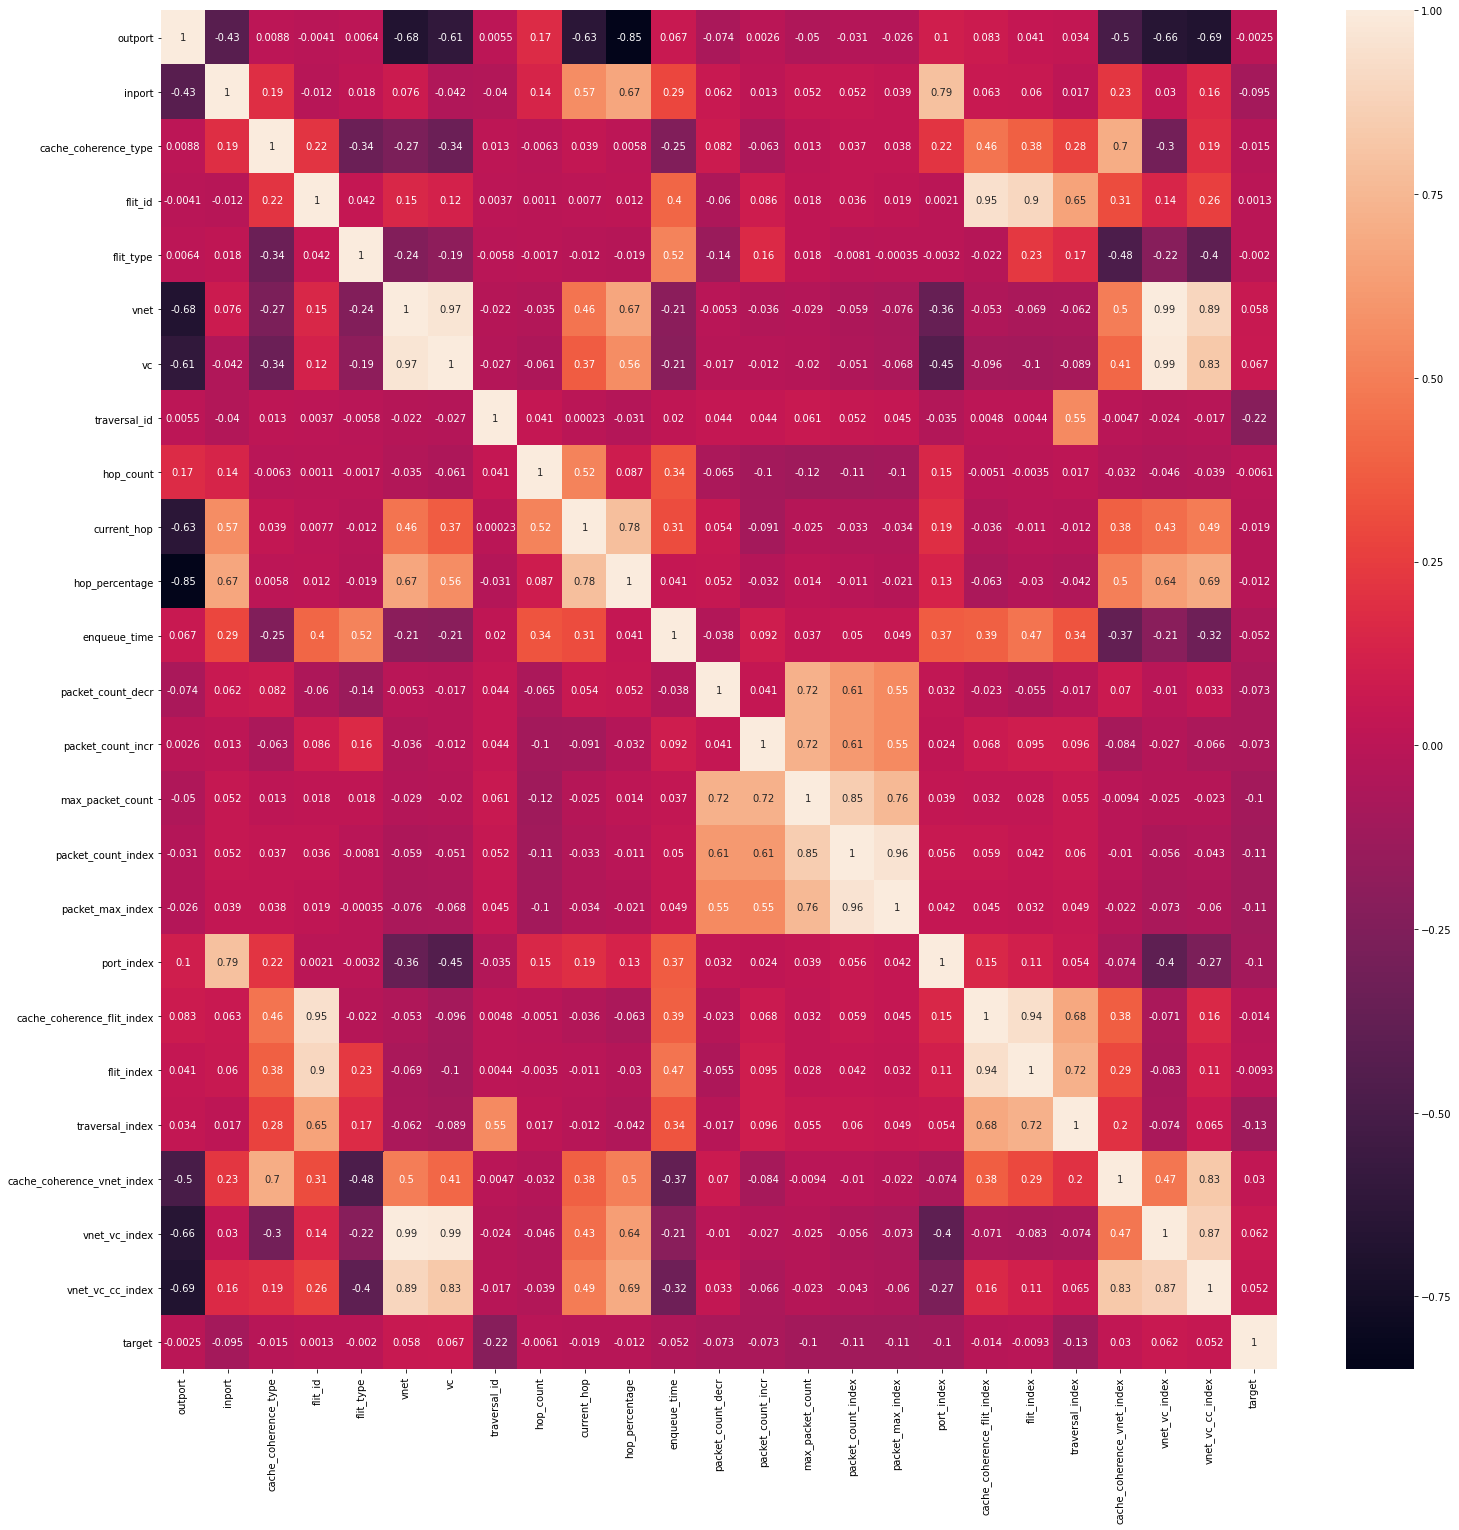

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,1,4,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9
1,2,0,1,1,4,3,9,1,4,0,0.000000,4,6,1,6,6,36,0,1,4,4,3,27,9
2,2,0,1,1,4,3,9,1,4,0,0.000000,4,6,1,6,6,36,0,1,4,4,3,27,9
3,2,0,1,1,4,3,9,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9
4,2,0,1,1,4,3,9,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704290,1,2,6,2,2,3,9,20057,3,2,0.666667,19,1,1,1,1,1,2,12,24,481368,18,27,54
704291,1,2,6,3,2,3,9,20057,3,2,0.666667,26,1,1,1,1,1,2,18,36,722052,18,27,54
704292,1,2,6,4,2,3,9,20057,3,2,0.666667,33,1,1,1,1,1,2,24,48,962736,18,27,54
704293,1,2,6,5,3,3,9,20057,3,2,0.666667,40,1,1,1,1,1,2,30,90,1805130,18,27,54


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.171429,0.0,0.171429,0.017595,0.003899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.142857,0.0,0.142857,0.014663,0.002843,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.142857,0.0,0.142857,0.014663,0.002843,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.028571,0.0,0.028571,0.002933,0.000244,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.028571,0.0,0.028571,0.002933,0.000244,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704290,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.758806,0.500000,0.333333,0.666667,0.214286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.202395,0.833333,0.000000,0.494505
704291,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.758806,0.500000,0.333333,0.666667,0.314286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.303594,0.833333,0.000000,0.494505
704292,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.758806,0.500000,0.333333,0.666667,0.414286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.404792,0.833333,0.000000,0.494505
704293,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.758806,0.500000,0.333333,0.666667,0.514286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.758987,0.833333,0.000000,0.494505


In [0]:
train_X[train_X.duplicated()].shape

(16965, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.0,0.000000,0.033333,0.000000,0.033333,0.003922,0.000378,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000365,0.833333,0.500000,0.6,0.179104,0.000000,0.033333,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.0,0.238806,0.366667,0.000000,0.366667,0.043137,0.018021,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000487,0.666667,0.333333,0.5,0.119403,0.333333,0.033333,0.366667,0.082353,0.033144,1.0,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.0,0.253731,0.300000,0.066667,0.366667,0.113725,0.045243,0.0,0.241379,0.139535,0.000016,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,1.0,0.666667,0.00,0.000000,0.0,0.000,0.999878,0.500000,0.500000,1.0,0.179104,0.033333,0.100000,0.133333,0.027451,0.004915,0.0,0.137931,0.011628,0.055577,0.666667,0.000000,0.395604
29996,1.0,0.0,0.666667,0.75,0.333333,0.0,0.000,0.999757,0.166667,0.000000,0.0,0.313433,0.000000,0.133333,0.133333,0.015686,0.003025,0.0,0.655172,0.418605,0.444604,0.666667,0.000000,0.395604
29997,0.0,1.0,0.666667,0.25,0.333333,0.0,0.000,0.999878,0.500000,0.500000,1.0,0.283582,0.866667,0.000000,0.866667,0.101961,0.091745,0.0,0.310345,0.186047,0.222326,0.666667,0.000000,0.395604
29998,1.0,0.0,0.666667,1.00,0.666667,0.0,0.000,0.999757,0.166667,0.000000,0.0,0.417910,0.833333,0.033333,0.866667,0.200000,0.176812,0.0,0.827586,0.825581,0.833637,0.666667,0.000000,0.395604


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.666667,0.000000,0.0,0.000000,0.038462,0.000000,0.038462,0.005128,0.000567,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.0,0.000356,0.833333,0.500000,0.6,0.176471,0.000000,0.038462,0.038462,0.005128,0.000567,1.0,0.000000,0.000000,0.000016,0.000000,0.0,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.0,0.000000,0.666667,0.666667,1.0,0.235294,0.384615,0.000000,0.384615,0.051282,0.022680,0.0,0.103448,0.000000,0.000000,0.944444,1.0,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.0,0.000000,0.666667,0.666667,1.0,0.264706,0.346154,0.038462,0.384615,0.097436,0.041391,0.0,0.241379,0.139535,0.000016,0.944444,1.0,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.0,0.000000,0.666667,0.666667,1.0,0.279412,0.307692,0.076923,0.384615,0.133333,0.055944,0.0,0.379310,0.232558,0.000026,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.5,0.500000,0.75,0.333333,1.0,1.0,0.999644,0.833333,0.833333,1.0,0.338235,0.000000,0.153846,0.153846,0.020513,0.004536,0.0,0.517241,0.325581,0.355679,0.944444,1.0,1.000000
29996,0.0,0.5,0.500000,1.00,0.666667,1.0,1.0,0.999644,0.833333,0.833333,1.0,0.397059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.655172,0.651163,0.666903,0.944444,1.0,1.000000
29997,0.5,1.0,0.833333,0.00,0.000000,0.0,0.0,1.000000,0.333333,0.166667,0.5,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.172414,0.023256,0.066709,0.833333,0.0,0.494505
29998,0.5,1.0,0.833333,0.25,0.333333,0.0,0.0,1.000000,0.333333,0.166667,0.5,0.161765,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266853,0.833333,0.0,0.494505


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.003922,0.000378,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000356,0.833333,0.500000,0.600000,0.196721,0.000000,0.033333,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.262295,0.333333,0.000000,0.333333,0.039216,0.015123,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.278689,0.300000,0.033333,0.333333,0.074510,0.027599,0.0,0.241379,0.139535,0.000016,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.295082,0.266667,0.066667,0.333333,0.101961,0.037303,0.0,0.379310,0.232558,0.000026,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999525,0.500000,0.333333,0.666667,0.590164,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
29996,0.5,1.0,0.166667,0.00,1.000000,0.0,0.125,0.999644,0.500000,0.333333,0.666667,0.590164,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.034483,0.046512,0.088895,0.166667,0.051724,0.098901
29997,0.5,1.0,0.833333,0.00,0.000000,0.0,0.000,1.000000,0.333333,0.166667,0.500000,0.065574,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.172414,0.023256,0.066693,0.833333,0.000000,0.494505
29998,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,1.000000,0.333333,0.166667,0.500000,0.180328,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266790,0.833333,0.000000,0.494505


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.193548,0.000000,0.193548,0.022140,0.005515,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.242424,0.161290,0.032258,0.193548,0.040590,0.009537,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000359,0.833333,0.500000,0.600000,0.181818,0.129032,0.064516,0.193548,0.051661,0.011950,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.257576,0.096774,0.096774,0.193548,0.055351,0.012754,0.0,0.241379,0.139535,0.000016,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.272727,0.064516,0.129032,0.193548,0.051661,0.011950,0.0,0.379310,0.232558,0.000027,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999880,0.500000,0.333333,0.666667,0.227273,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266663,0.833333,0.000000,0.494505
29996,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999880,0.500000,0.333333,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399997,0.833333,0.000000,0.494505
29997,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999880,0.500000,0.333333,0.666667,0.439394,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.494505
29998,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999880,0.500000,0.333333,0.666667,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.00,0.000000,0.033333,0.000000,0.033333,0.003922,0.000378,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000355,0.833333,0.500000,0.60,0.176471,0.000000,0.033333,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.00,0.235294,0.333333,0.000000,0.333333,0.039216,0.015123,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.00,0.250000,0.300000,0.033333,0.333333,0.074510,0.027599,0.0,0.241379,0.139535,0.000016,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.00,0.264706,0.266667,0.066667,0.333333,0.101961,0.037303,0.0,0.379310,0.232558,0.000026,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.666667,1.00,0.666667,0.0,0.000,0.999882,0.500000,0.000000,0.00,0.411765,0.033333,0.233333,0.266667,0.058824,0.018021,0.0,0.827586,0.825581,0.833530,0.666667,0.000000,0.395604
29996,1.0,0.0,0.000000,0.00,1.000000,0.0,0.125,1.000000,0.500000,0.000000,0.00,0.411765,0.000000,0.266667,0.266667,0.031373,0.010082,0.0,0.000000,0.000000,0.044455,0.000000,0.051724,0.000000
29997,0.5,1.0,0.833333,0.00,0.000000,0.0,0.000,0.999882,0.666667,0.500000,0.75,0.176471,0.366667,0.000000,0.366667,0.043137,0.018021,1.0,0.172414,0.023256,0.066678,0.833333,0.000000,0.494505
29998,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999882,0.666667,0.500000,0.75,0.279412,0.333333,0.033333,0.366667,0.082353,0.033144,1.0,0.379310,0.232558,0.266726,0.833333,0.000000,0.494505


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.00,0.000000,0.666667,0.000000,0.0,0.000000,0.03125,0.00000,0.03125,0.003472,0.000315,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.00,0.000355,0.833333,0.500000,0.6,0.176471,0.00000,0.03125,0.03125,0.003472,0.000315,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.00,0.000000,0.666667,0.666667,1.0,0.235294,0.31250,0.00000,0.31250,0.034722,0.012584,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.00,0.000000,0.666667,0.666667,1.0,0.250000,0.28125,0.03125,0.31250,0.065972,0.022966,0.0,0.241379,0.139535,0.000016,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.00,0.000000,0.666667,0.666667,1.0,0.264706,0.25000,0.06250,0.31250,0.090278,0.031040,0.0,0.379310,0.232558,0.000026,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.5,0.500000,0.75,0.333333,1.0,1.00,0.999882,0.166667,0.166667,1.0,0.117647,0.03125,0.09375,0.12500,0.024306,0.004090,0.0,0.517241,0.325581,0.355594,0.944444,1.000000,1.000000
29996,0.0,0.5,0.500000,1.00,0.666667,1.0,1.00,0.999882,0.166667,0.166667,1.0,0.161765,0.00000,0.12500,0.12500,0.013889,0.002517,0.0,0.655172,0.651163,0.666744,0.944444,1.000000,1.000000
29997,1.0,0.0,0.666667,0.00,0.000000,0.0,0.25,1.000000,0.500000,0.000000,0.0,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.137931,0.011628,0.055564,0.666667,0.103448,0.395604
29998,1.0,0.0,0.666667,0.25,0.333333,0.0,0.25,1.000000,0.500000,0.000000,0.0,0.102941,0.00000,0.00000,0.00000,0.000000,0.000000,0.0,0.310345,0.186047,0.222271,0.666667,0.103448,0.395604


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.0,0.000000,0.208333,0.000000,0.208333,0.029762,0.008286,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.0,0.266667,0.166667,0.041667,0.208333,0.053571,0.013968,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.0,0.283333,0.125000,0.083333,0.208333,0.065476,0.016809,0.0,0.241379,0.139535,0.000020,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.0,0.300000,0.083333,0.125000,0.208333,0.065476,0.016809,0.0,0.379310,0.232558,0.000034,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.75,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.0,0.316667,0.041667,0.166667,0.208333,0.053571,0.013968,0.0,0.517241,0.325581,0.000047,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999849,0.333333,0.166667,0.5,0.183333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266662,0.833333,0.000000,0.494505
29996,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999849,0.333333,0.166667,0.5,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399996,0.833333,0.000000,0.494505
29997,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999849,0.333333,0.166667,0.5,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.533330,0.833333,0.000000,0.494505
29998,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999849,0.333333,0.166667,0.5,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    360000
1    344295
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
17                  port_index  4676.956453
7                 traversal_id  4089.708711
1                       inport  1854.461944
20             traversal_index  1527.520457
5                         vnet  1359.503632
22               vnet_vc_index  1306.238682
6                           vc  1249.732504
14            max_packet_count   817.311883
15          packet_count_index   630.623511
16            packet_max_index   610.093830
13           packet_count_incr   416.722344
12           packet_count_decr   400.668159
23            vnet_vc_cc_index   263.383906
11                enqueue_time   144.811458
9                  current_hop    59.423264
21  cache_coherence_vnet_index    48.273667
10              hop_percentage    30.604928


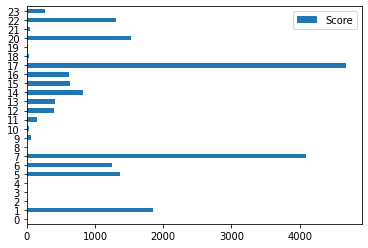

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 60.533760711065675
Test Prediction  60.36320007951213


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  74.37666666666667


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  75.06666666666668


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.94


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  71.28999999999999


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  72.05


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  71.0


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  33.489999999999995


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,6.266245
11,enqueue_time,0.941168
10,hop_percentage,0.532933
21,cache_coherence_vnet_index,0.418906
2,cache_coherence_type,0.385826
17,port_index,0.362407
23,vnet_vc_cc_index,0.281299
8,hop_count,0.224806
4,flit_type,0.211049
3,flit_id,0.106559


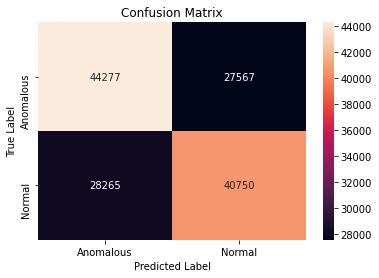

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61     71844
           1       0.60      0.59      0.59     69015

    accuracy                           0.60    140859
   macro avg       0.60      0.60      0.60    140859
weighted avg       0.60      0.60      0.60    140859



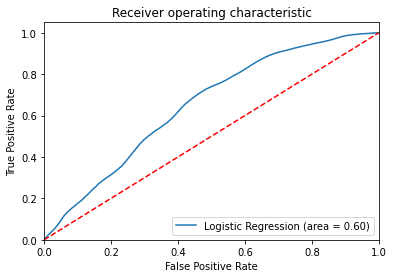

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

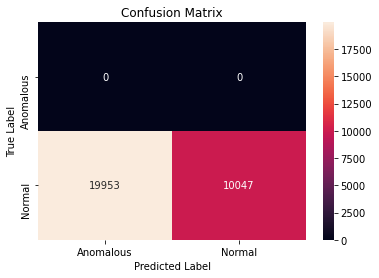

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50     30000

    accuracy                           0.33     30000
   macro avg       0.50      0.17      0.25     30000
weighted avg       1.00      0.33      0.50     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 83.60488147722191
Test Prediction  75.31574127318808


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  66.30333333333334


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  68.16666666666666


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  66.49333333333334


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  62.86000000000001


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  64.87


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  61.7


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  39.50666666666667


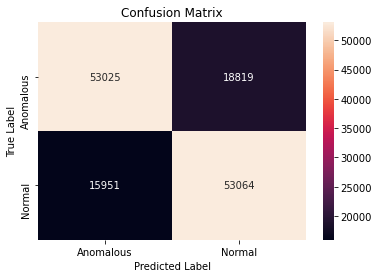

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     71844
           1       0.74      0.77      0.75     69015

    accuracy                           0.75    140859
   macro avg       0.75      0.75      0.75    140859
weighted avg       0.75      0.75      0.75    140859



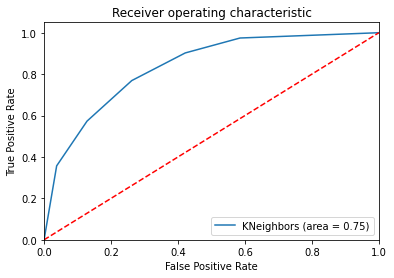

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

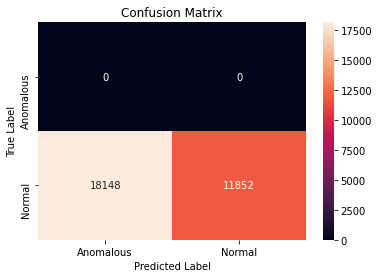

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57     30000

    accuracy                           0.40     30000
   macro avg       0.50      0.20      0.28     30000
weighted avg       1.00      0.40      0.57     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 58.95114973129157
Test Prediction Score 58.897195067407836


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 59.88


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  62.82333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  55.86333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  55.64333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  56.733333333333334


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  54.05333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  46.69


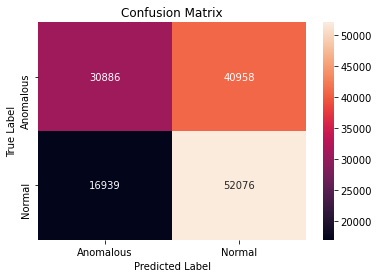

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52     71844
           1       0.56      0.75      0.64     69015

    accuracy                           0.59    140859
   macro avg       0.60      0.59      0.58    140859
weighted avg       0.60      0.59      0.58    140859



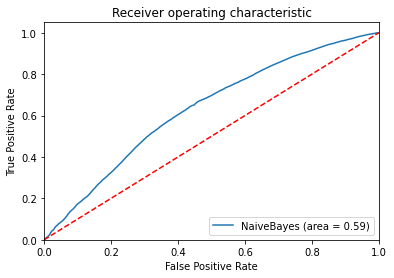

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 450748 samples, validate on 112688 samples
Epoch 1/10
450748/450748 [==============================] - 16s 36us/step - loss: 0.2351 - accuracy: 0.6010 - val_loss: 0.2324 - val_accuracy: 0.6134
Epoch 2/10
450748/450748 [==============================] - 16s 36us/step - loss: 0.2287 - accuracy: 0.6196 - val_loss: 0.2231 - val_accuracy: 0.6315
Epoch 3/10
450748/450748 [==============================] - 16s 36us/step - loss: 0.2190 - accuracy: 0.6320 - val_loss: 0.2170 - val_accuracy: 0.6335
Epoch 4/10
450748/450748 [==============================] - 16s 36us/step - loss: 0.2169 - accuracy: 0.6343 - val_loss: 0.2161 - val_accuracy: 0.6357
Epoch 5/10
450748/450748 [==============================] - 16s 36us/step - loss: 0.2163 - accuracy: 0.6361 - val_loss: 0.2168 - val_accuracy: 0.6333
Epoch 6/10
450748/450748 [==============================] - 16s 36us/step - loss: 0.2159 - accuracy: 0.6370 - val_loss: 0.2154 - val_accuracy: 0.6378
Epoch 7/10
450748/450748 [======================

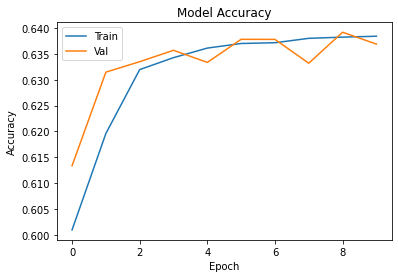

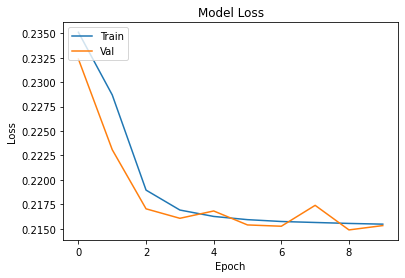

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.63%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.93%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.76%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.94%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.45%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.10%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.30%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 41.88%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 450748 samples, validate on 112688 samples
Epoch 1/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2414 - accuracy: 0.5838 - val_loss: 0.2356 - val_accuracy: 0.6098
Epoch 2/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2341 - accuracy: 0.6136 - val_loss: 0.2345 - val_accuracy: 0.6136
Epoch 3/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2333 - accuracy: 0.6151 - val_loss: 0.2335 - val_accuracy: 0.6160
Epoch 4/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2328 - accuracy: 0.6155 - val_loss: 0.2332 - val_accuracy: 0.6118
Epoch 5/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2325 - accuracy: 0.6165 - val_loss: 0.2334 - val_accuracy: 0.6147
Epoch 6/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2324 - accuracy: 0.6168 - val_loss: 0.2328 - val_accuracy: 0.6190
Epoch 7/30
450748/450748 [======================

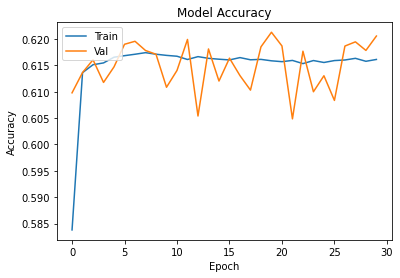

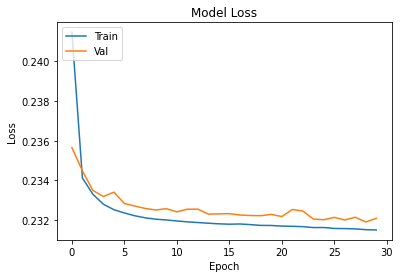

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.17%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.24%
accuracy: 69.98%
accuracy: 65.27%
accuracy: 66.81%
accuracy: 67.61%
accuracy: 66.11%
accuracy: 39.82%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 450748 samples, validate on 112688 samples
Epoch 1/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2492 - accuracy: 0.5288 - val_loss: 0.2485 - val_accuracy: 0.5381
Epoch 2/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2476 - accuracy: 0.5455 - val_loss: 0.2474 - val_accuracy: 0.5478
Epoch 3/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2467 - accuracy: 0.5523 - val_loss: 0.2467 - val_accuracy: 0.5520
Epoch 4/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2383 - accuracy: 0.5981 - val_loss: 0.2346 - val_accuracy: 0.6107
Epoch 5/30
450748/450748 [==============================] - 16s 35us/step - loss: 0.2333 - accuracy: 0.6143 - val_loss: 0.2333 - val_accuracy: 0.6155
Epoch 6/30
450748/450748 [==============================] - 16s 37us/step - loss: 0.2323 - accuracy: 0.6181 - val_loss: 0.2324 - val_accuracy: 0.6179
Epoch 7/30
450748/450748 [======================

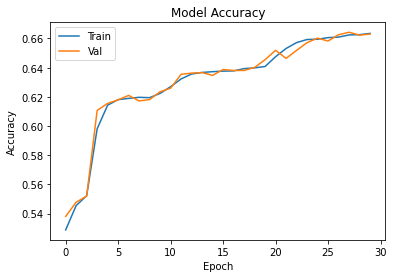

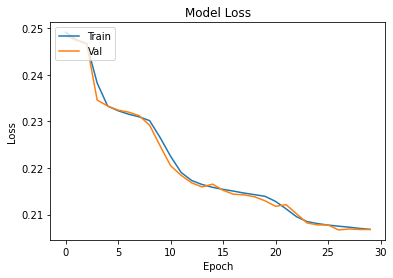

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.20%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.30%
accuracy: 62.05%
accuracy: 56.96%
accuracy: 56.28%
accuracy: 57.63%
accuracy: 56.14%
accuracy: 47.83%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 450748 samples, validate on 112688 samples
Epoch 1/100
450748/450748 [==============================] - 28s 63us/step - loss: 0.2170 - accuracy: 0.6391 - val_loss: 0.2056 - val_accuracy: 0.6693
Epoch 2/100
450748/450748 [==============================] - 28s 62us/step - loss: 0.2089 - accuracy: 0.6586 - val_loss: 0.1983 - val_accuracy: 0.6871
Epoch 3/100
450748/450748 [==============================] - 28s 62us/step - loss: 0.2026 - accuracy: 0.6716 - val_loss: 0.1906 - val_accuracy: 0.6909
Epoch 4/100
450748/450748 [==============================] - 28s 63us/step - loss: 0.1969 - accuracy: 0.6827 - val_loss: 0.1832 - val_accuracy: 0.7120
Epoch 5/100
450748/450748 [==============================] - 28s 63us/step - loss: 0.1943 - accuracy: 0.6882 - val_loss: 0.1847 - val_accuracy: 0.7081
Epoch 6/100
450748/450748 [==============================] - 28s 62us/step - loss: 0.1925 - accuracy: 0.6916 - val_loss: 0.1796 - val_accuracy: 0.7176
Epoch 7/100
450748/450748 [===============

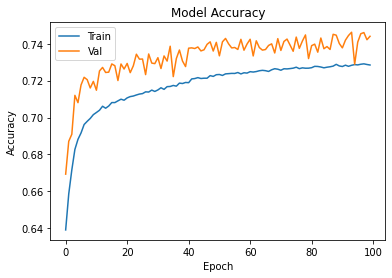

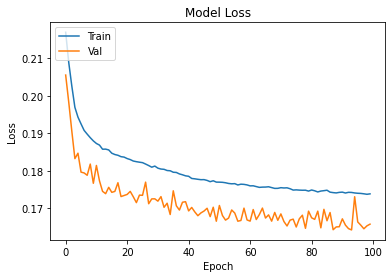

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.31%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.47%
accuracy: 67.93%
accuracy: 66.14%
accuracy: 61.63%
accuracy: 62.05%
accuracy: 60.26%
accuracy: 45.41%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 450748 samples, validate on 112688 samples
Epoch 1/50
450748/450748 [==============================] - 29s 64us/step - loss: 0.2177 - accuracy: 0.6383 - val_loss: 0.2113 - val_accuracy: 0.6461
Epoch 2/50
450748/450748 [==============================] - 28s 63us/step - loss: 0.2082 - accuracy: 0.6581 - val_loss: 0.1995 - val_accuracy: 0.6738
Epoch 3/50
450748/450748 [==============================] - 28s 63us/step - loss: 0.2017 - accuracy: 0.6729 - val_loss: 0.1887 - val_accuracy: 0.6940
Epoch 4/50
450748/450748 [==============================] - 28s 62us/step - loss: 0.1964 - accuracy: 0.6847 - val_loss: 0.1840 - val_accuracy: 0.7125
Epoch 5/50
450748/450748 [==============================] - 28s 63us/step - loss: 0.1936 - accuracy: 0.6907 - val_loss: 0.1840 - val_accuracy: 0.7094
Epoch 6/50
450748/450748 [==============================] - 28s 63us/step - loss: 0.1910 - accuracy: 0.6971 - val_loss: 0.1796 - val_accuracy: 0.7192
Epoch 7/50
450748/450748 [======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.63%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.39%
accuracy: 65.68%
accuracy: 62.85%
accuracy: 60.12%
accuracy: 60.45%
accuracy: 59.51%
accuracy: 46.82%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 93.98973441526634
Test Prediction Score 89.3233659191106


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 65.11
Test Prediction Score 65.58
Test Prediction Score 65.31333333333333
Test Prediction Score 61.67
Test Prediction Score 62.473333333333336
Test Prediction Score 61.736666666666665
Test Prediction Score 41.596666666666664


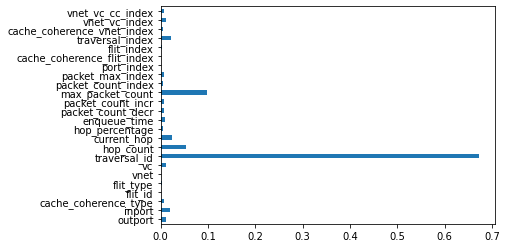

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

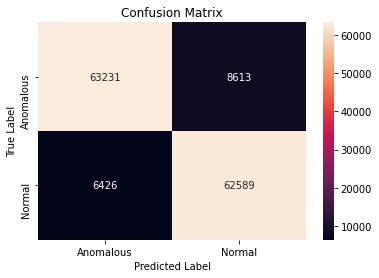

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     71844
           1       0.88      0.91      0.89     69015

    accuracy                           0.89    140859
   macro avg       0.89      0.89      0.89    140859
weighted avg       0.89      0.89      0.89    140859



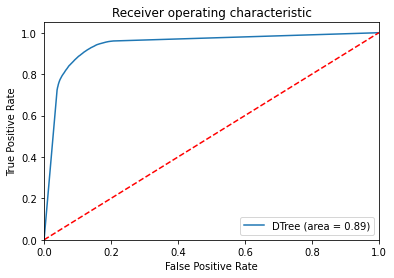

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.44602758787157
Test Prediction Score 91.53124755961636


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 65.5
Test Prediction Score 65.78
Test Prediction Score 65.28333333333333
Test Prediction Score 61.126666666666665
Test Prediction Score 62.43666666666666
Test Prediction Score 61.44333333333334
Test Prediction Score 42.699999999999996


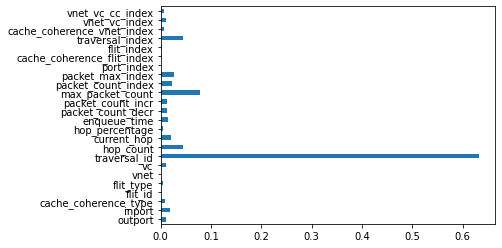

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

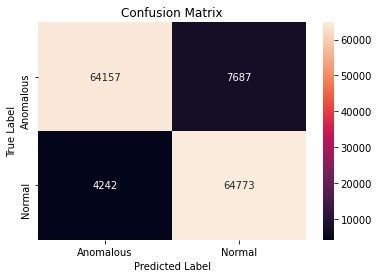

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     71844
           1       0.89      0.94      0.92     69015

    accuracy                           0.92    140859
   macro avg       0.92      0.92      0.92    140859
weighted avg       0.92      0.92      0.92    140859



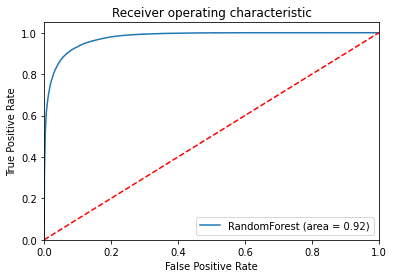

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.56960506605897
Test Prediction Score 94.57684634989599


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 68.15333333333334
Test Prediction Score 68.63666666666667
Test Prediction Score 68.55666666666667
Test Prediction Score 63.65
Test Prediction Score 65.34666666666666
Test Prediction Score 63.346666666666664
Test Prediction Score 40.166666666666664


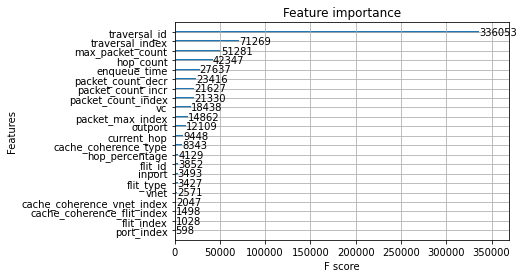

In [0]:
plot_importance(xgbc)
plt.show()

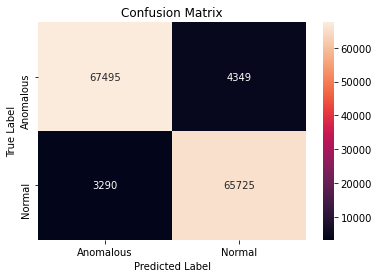

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     71844
           1       0.94      0.95      0.95     69015

    accuracy                           0.95    140859
   macro avg       0.95      0.95      0.95    140859
weighted avg       0.95      0.95      0.95    140859



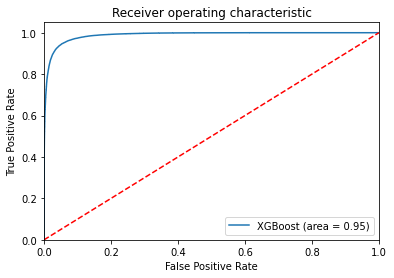

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 82.03771147033558
Test Prediction Score 81.37712180265372


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 65.47666666666667
Test Prediction Score 66.77
Test Prediction Score 65.29
Test Prediction Score 60.49333333333333
Test Prediction Score 62.77666666666667
Test Prediction Score 60.74333333333334
Test Prediction Score 42.96333333333333


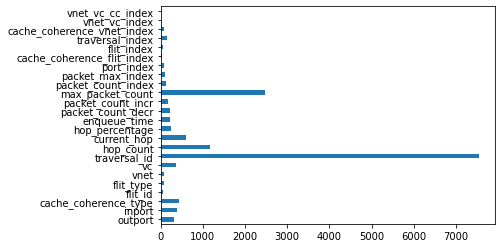

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

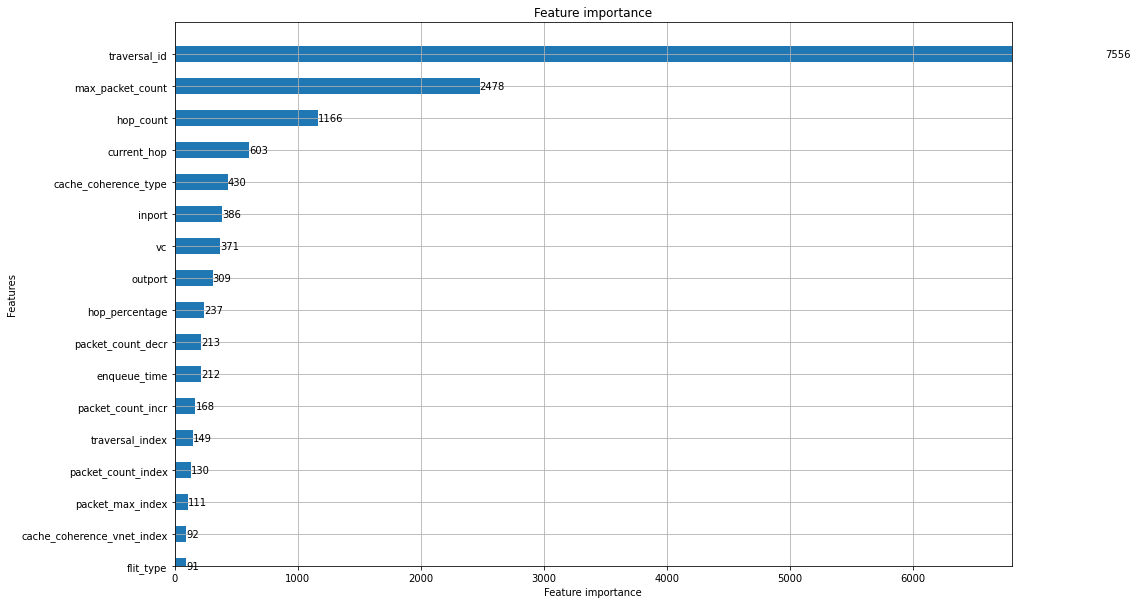

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7556,
 2478,
 1166,
 603,
 430,
 386,
 371,
 309,
 237,
 213,
 212,
 168,
 149,
 130,
 111,
 92,
 91,
 86,
 82,
 54,
 51,
 25,
 0,
 0]

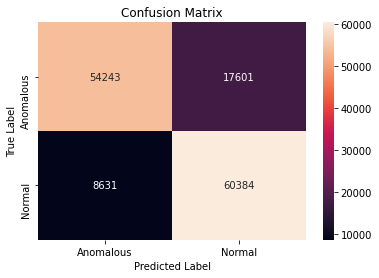

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81     71844
           1       0.77      0.87      0.82     69015

    accuracy                           0.81    140859
   macro avg       0.82      0.81      0.81    140859
weighted avg       0.82      0.81      0.81    140859



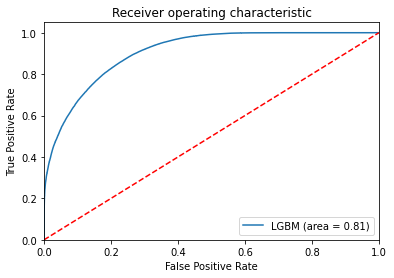

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()